In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

%matplotlib inline

stats = pd.read_csv('season.csv', sep=',')
        
le = preprocessing.LabelEncoder()
for column_name in stats.columns:
    if stats[column_name].dtype == object:
        stats[column_name] = le.fit_transform(stats[column_name])
    else:
        pass
    
stats.head(10)


,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,11,5,23,20,68,6,1055,10.1,0.560,0.724,...,0.898,18,68,86,40,37,8,33,114,406
1,373,1,26,28,38,1,558,11.8,0.565,0.529,...,0.750,20,95,115,18,14,15,21,67,222
2,373,1,26,6,6,0,48,-1.4,0.355,0.412,...,0.667,2,6,8,0,0,0,2,9,13
3,373,1,26,2,32,1,510,13.1,0.587,0.542,...,0.754,18,89,107,18,14,15,19,58,209
4,425,0,23,20,80,80,2389,16.5,0.589,0.002,...,0.611,282,333,615,86,88,78,146,195,905
5,32,5,31,25,61,45,1580,9.0,0.559,0.360,...,0.892,9,116,125,78,21,7,42,104,515
6,14,0,28,18,39,15,584,12.9,0.529,0.022,...,0.725,46,131,177,12,20,22,31,77,207
7,77,0,28,17,62,0,531,12.7,0.549,0.000,...,0.682,51,107,158,25,25,23,17,85,105
8,281,1,31,26,72,72,2335,18.6,0.532,0.053,...,0.812,174,350,524,139,46,89,98,158,1243
9,288,1,27,11,61,5,871,11.6,0.485,0.006,...,0.697,105,115,220,57,18,24,29,78,177


In [2]:
bins = (0,500,1000,1800,2700)
group_names = ['bench', 'role-player', 'star', 'all-star']
stats['PTS'] = pd.cut(stats['PTS'], bins = bins, labels = group_names, include_lowest=True)
stats['PTS'].unique()

[bench, role-player, star, all-star]
Categories (4, object): [bench < role-player < star < all-star]

In [3]:
label_quality = LabelEncoder()

In [4]:
stats['PTS'] = label_quality.fit_transform(stats['PTS'].astype(str))

In [5]:
stats.head(100)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,11,5,23,20,68,6,1055,10.1,0.560,0.724,...,0.898,18,68,86,40,37,8,33,114,1
1,373,1,26,28,38,1,558,11.8,0.565,0.529,...,0.750,20,95,115,18,14,15,21,67,1
2,373,1,26,6,6,0,48,-1.4,0.355,0.412,...,0.667,2,6,8,0,0,0,2,9,1
3,373,1,26,2,32,1,510,13.1,0.587,0.542,...,0.754,18,89,107,18,14,15,19,58,1
4,425,0,23,20,80,80,2389,16.5,0.589,0.002,...,0.611,282,333,615,86,88,78,146,195,2
5,32,5,31,25,61,45,1580,9.0,0.559,0.360,...,0.892,9,116,125,78,21,7,42,104,2
6,14,0,28,18,39,15,584,12.9,0.529,0.022,...,0.725,46,131,177,12,20,22,31,77,1
7,77,0,28,17,62,0,531,12.7,0.549,0.000,...,0.682,51,107,158,25,25,23,17,85,1
8,281,1,31,26,72,72,2335,18.6,0.532,0.053,...,0.812,174,350,524,139,46,89,98,158,3
9,288,1,27,11,61,5,871,11.6,0.485,0.006,...,0.697,105,115,220,57,18,24,29,78,1


In [6]:
stats['PTS'].value_counts()

1    364
2    144
3     61
0     18
Name: PTS, dtype: int64

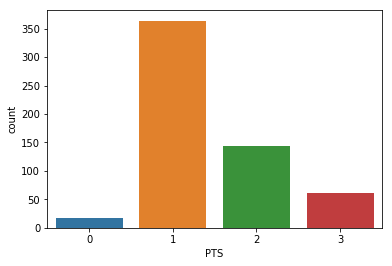

In [7]:
sns.countplot(stats['PTS'])

In [8]:
X = stats.drop('PTS', axis = 1)
y = stats['PTS']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [12]:
#pred_rfc[:200]
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00        81
          2       1.00      0.96      0.98        25
          3       0.89      1.00      0.94         8

avg / total       0.99      0.99      0.99       118

[[ 4  0  0  0]
 [ 0 81  0  0]
 [ 0  0 24  1]
 [ 0  0  0  8]]


In [13]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [14]:
print(classification_report(y_test, pred_clf))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.98      1.00      0.99        81
          2       0.92      0.96      0.94        25
          3       0.86      0.75      0.80         8

avg / total       0.96      0.96      0.95       118



In [20]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [21]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       0.98      1.00      0.99        81
          2       0.92      0.92      0.92        25
          3       1.00      0.75      0.86         8

avg / total       0.97      0.97      0.96       118

[[ 4  0  0  0]
 [ 0 81  0  0]
 [ 0  2 23  0]
 [ 0  0  2  6]]


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [300, 400, 500, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)